In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if hasattr(cv2, 'data'):
    print('Cascades are here:', cv2.data.haarcascades)
else:
    print('This may not work:')
    print(normpath(realpath(cv2.__file__) + '../../../../../share/OpenCV/haarcascades'))

Cascades are here: C:\ProgramData\Anaconda3\lib\site-packages\cv2\data\


In [3]:
model = load_model('model-011.model')

face_clsfr=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt2.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

# Remove Commenting from below code to use as realtime mask detector using webcam

In [ ]:
'''while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()'''

In [4]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=2, minSize=(15, 15))

    for (x, y, w, h) in faces_rect:
        #cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        face_img=gray_image[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(image_copy,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(image_copy,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(image_copy, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    return image_copy

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

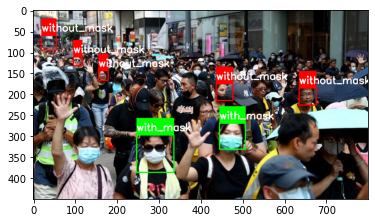

In [5]:
test_image2 = cv2.imread('test2.jpg')

#call the function to detect faces
faces = detect_faces(face_clsfr, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))